In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("../lib/")
sys.path.append("../survey_data_ana/")
sys.path.append("../optimization_result_ana/")
sys.path.append("../pol_est_sim/")
import subset_merge
import netload_ana
import get_dis_after_policy
import get_trips_distribution
import simu_traffic
import get_thre_basedon_surveydata
import company_survey_data_process
import IBTDM_acc_distribution
import opt_solve_SAT
from datetime import datetime, timezone, timedelta
from matplotlib import ticker
import copy
import utils
import time, datetime
import importlib
importlib.reload(get_thre_basedon_surveydata)
importlib.reload(company_survey_data_process)
importlib.reload(subset_merge)
importlib.reload(netload_ana)
importlib.reload(get_dis_after_policy)
importlib.reload(get_trips_distribution)
importlib.reload(simu_traffic)
importlib.reload(IBTDM_acc_distribution)
importlib.reload(opt_solve_SAT)

<module 'opt_solve_SAT' from '../survey_data_ana\\opt_solve_SAT.py'>

# 1.Analysis of COFFEE acceptance based on questionnaires

In [2]:
company_survey_data_process.survey_data.data_preprocess(data_file="../../data/survey_data/survey_data.xlsx",
                        strong_com_beh_file="../../data/survey_data/company_survey_data/AdjustdepartureforStrongcom.xlsx",
                        median_com_beh_file="../../data/survey_data/company_survey_data/AdjustdepartureforMediumgcom.xlsx",
                        weak_com_beh_file="../../data/survey_data/company_survey_data/AdjustdepartureforWeakcom.xlsx",
                        family_veh_beh_file="../../data/survey_data/company_survey_data/Adjustdepartureforlocalveh.xlsx",
                        business_veh_beh_file="../../data/survey_data/company_survey_data/Adjustdeparturefornonlocalveh.xlsx")

survey data rows: 500.
After filtering out the erroneous data, the remaining questionnaire data consists of 500
The total number of questionnaires using private cars for travel:500
Commuter travelers with strong regularity in travel:148
Commuter travelers with moderate regularity in travel:193
Commuter travelers with weak travel patterns:88
local vehicles:45
non local vehicles:26
taxis:0


D:\WorkFile\ResearchProjects\analysis_of_IBTDM\COFFEE_10percent\code\jupytercode\../survey_data_ana\IBTDM_acc_distribution.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df['adjust'] = df[['adjust']].applymap(lambda x:str(x))


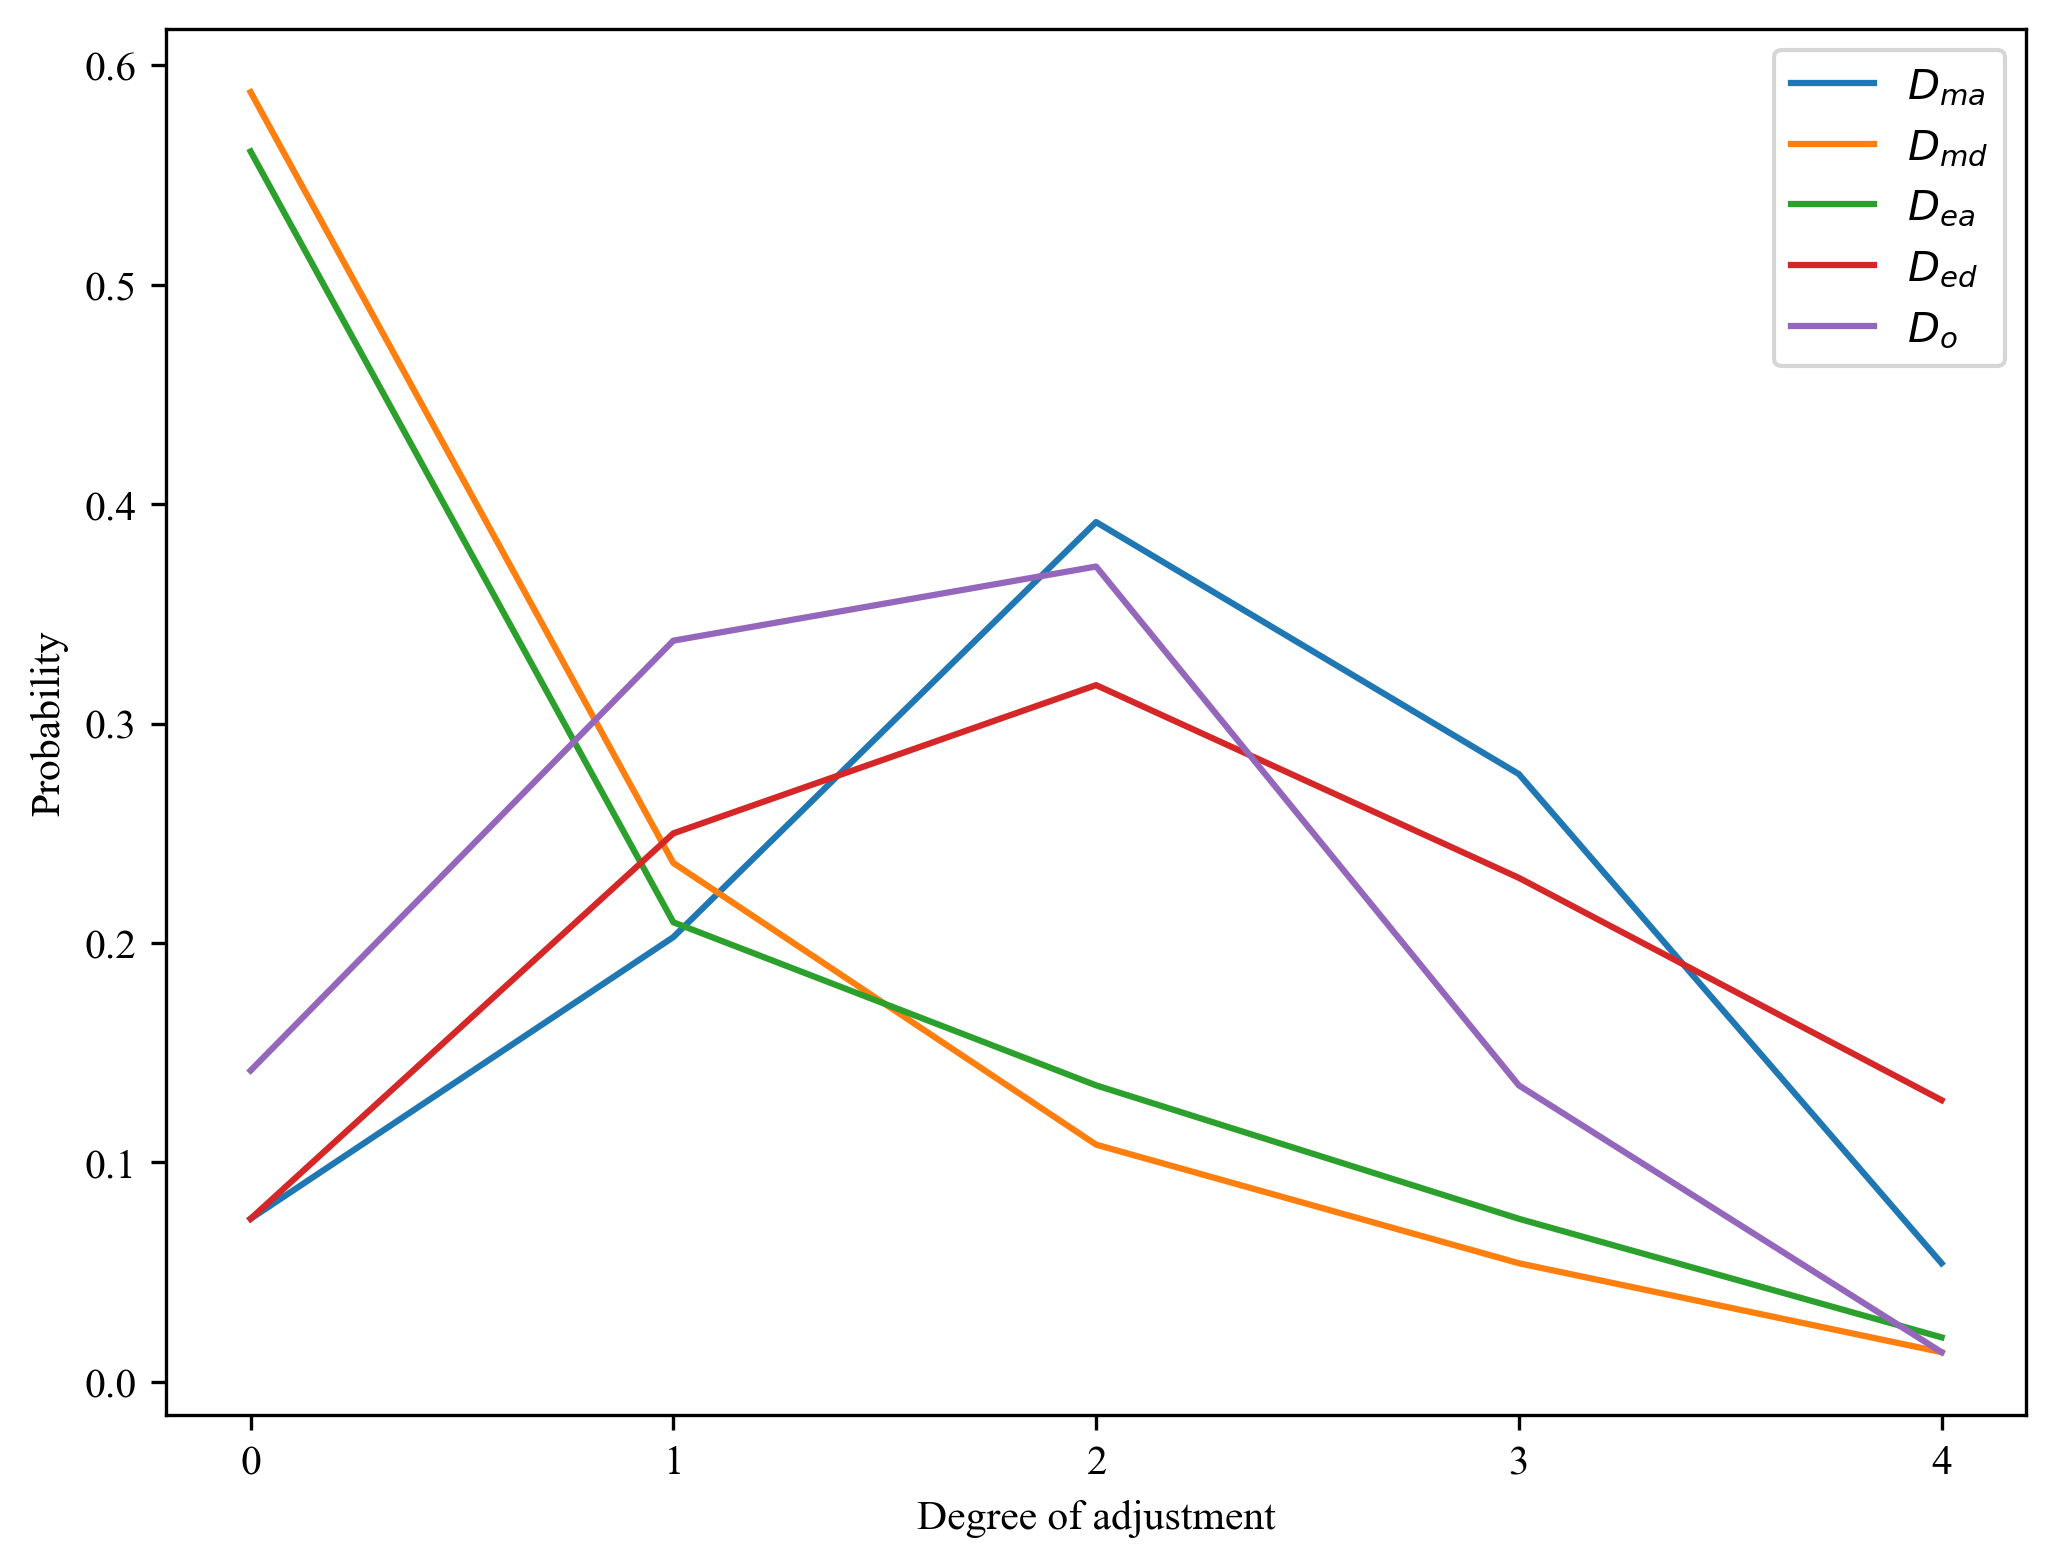

D:\WorkFile\ResearchProjects\analysis_of_IBTDM\COFFEE_10percent\code\jupytercode\../survey_data_ana\IBTDM_acc_distribution.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df['adjust'] = df[['adjust']].applymap(lambda x:str(x))


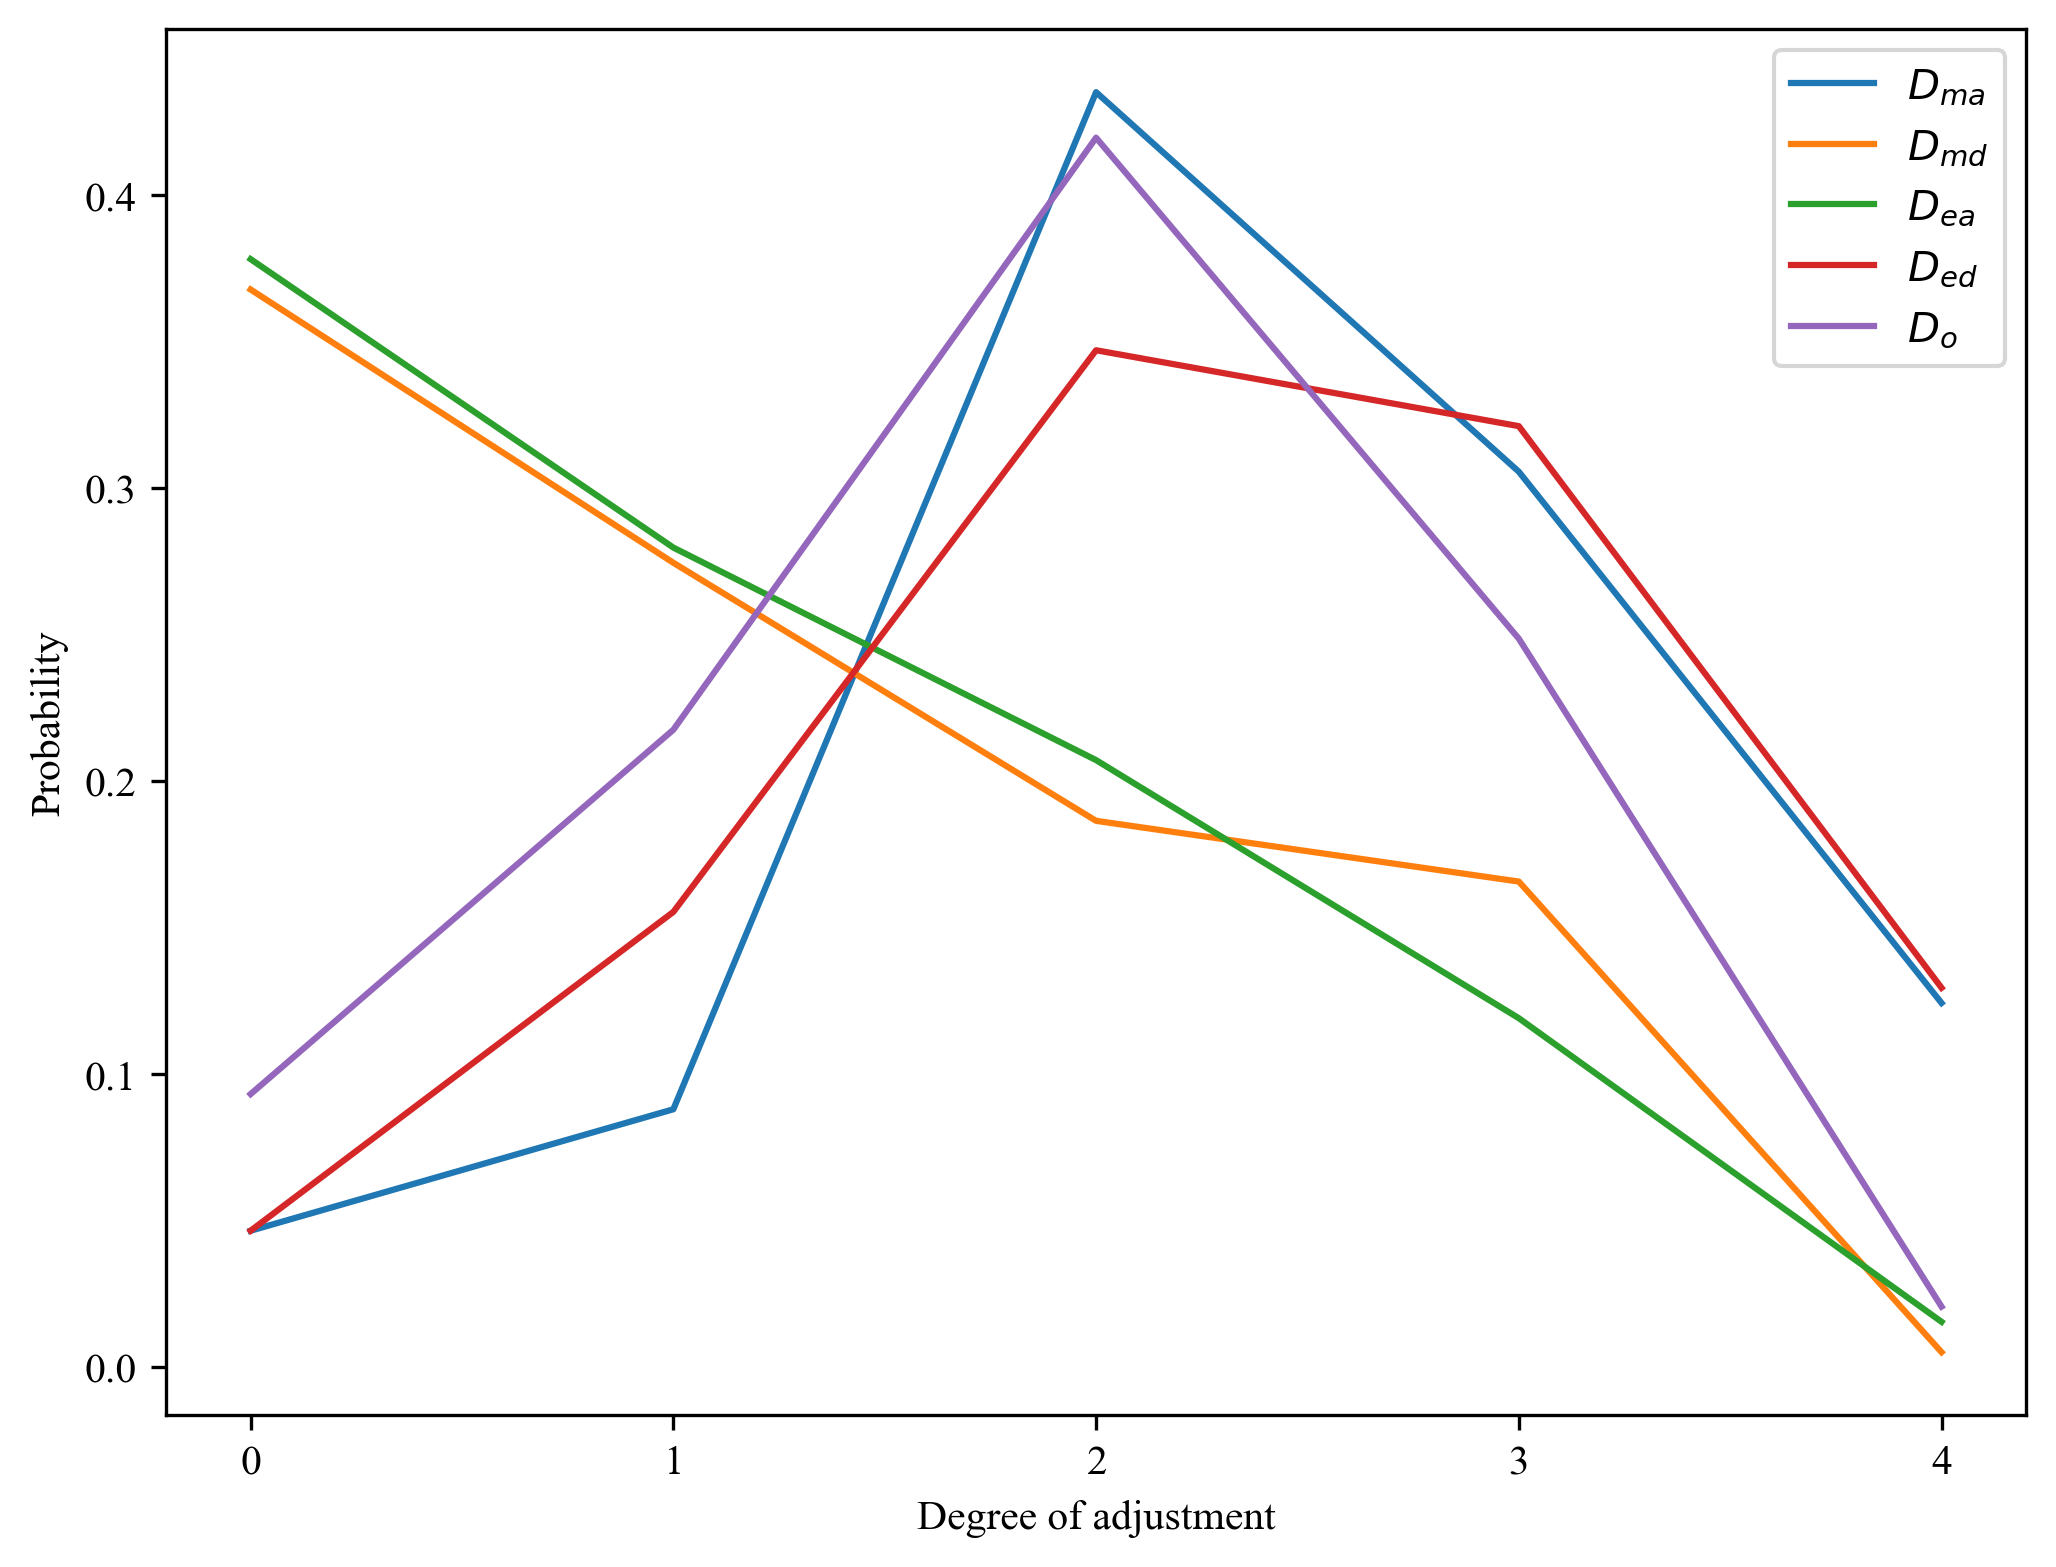

D:\WorkFile\ResearchProjects\analysis_of_IBTDM\COFFEE_10percent\code\jupytercode\../survey_data_ana\IBTDM_acc_distribution.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df['adjust'] = df[['adjust']].applymap(lambda x:str(x))


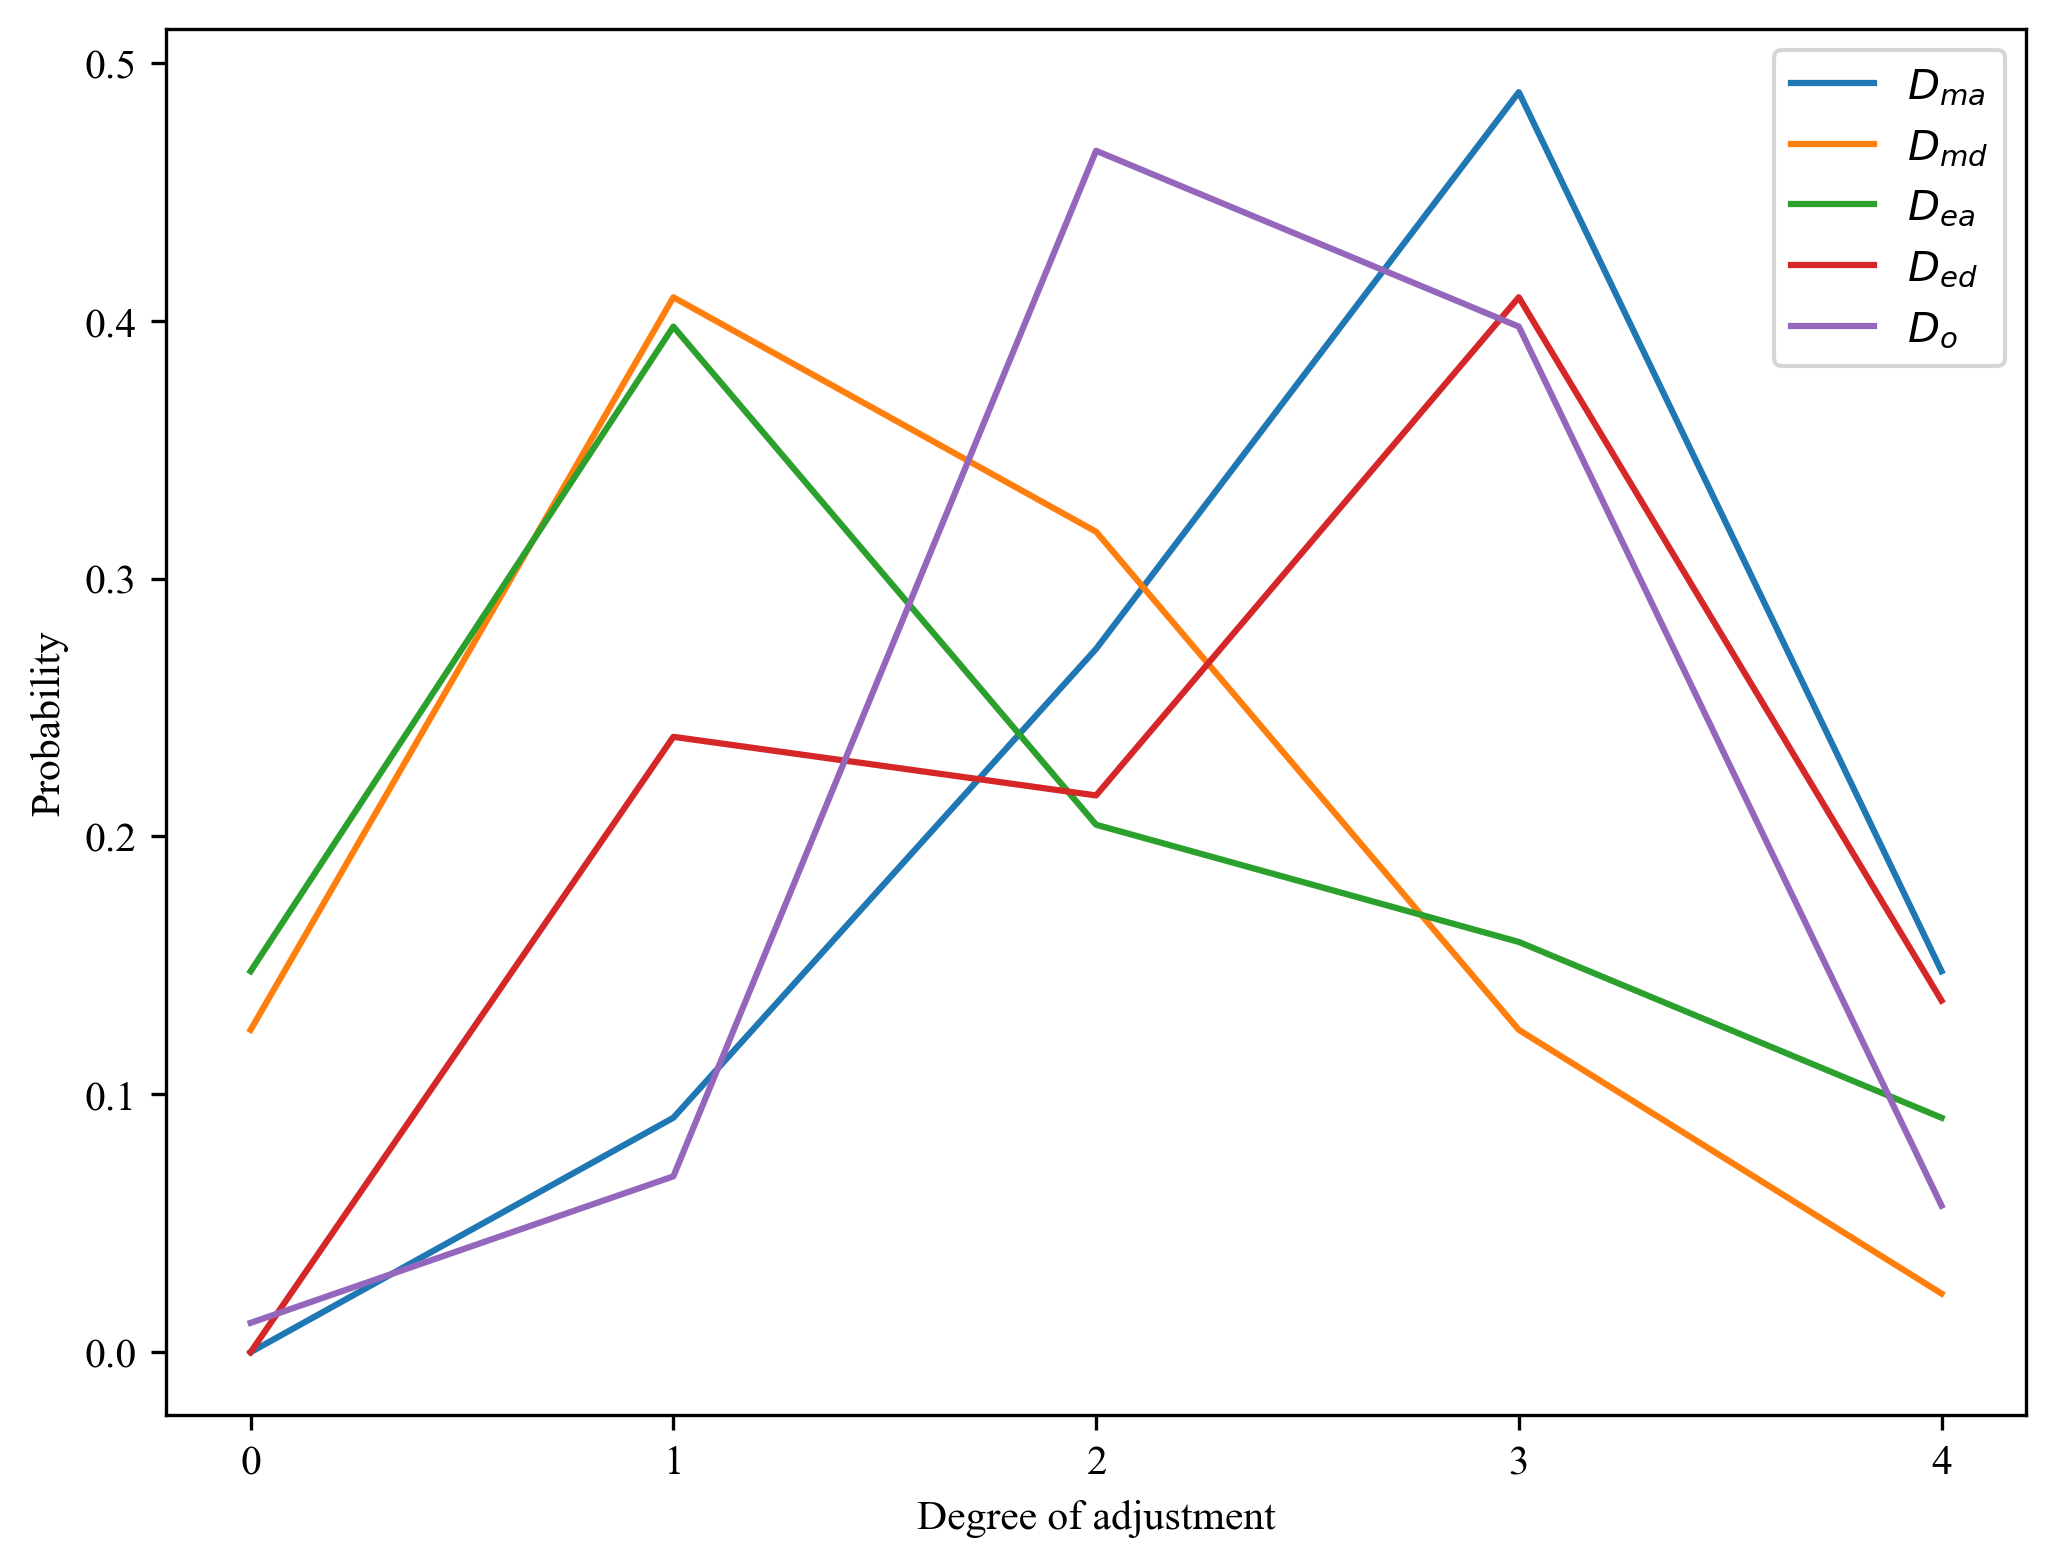

D:\WorkFile\ResearchProjects\analysis_of_IBTDM\COFFEE_10percent\code\jupytercode\../survey_data_ana\IBTDM_acc_distribution.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df['adjust'] = df[['adjust']].applymap(lambda x: str(x))
D:\WorkFile\ResearchProjects\analysis_of_IBTDM\COFFEE_10percent\code\jupytercode\../survey_data_ana\IBTDM_acc_distribution.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


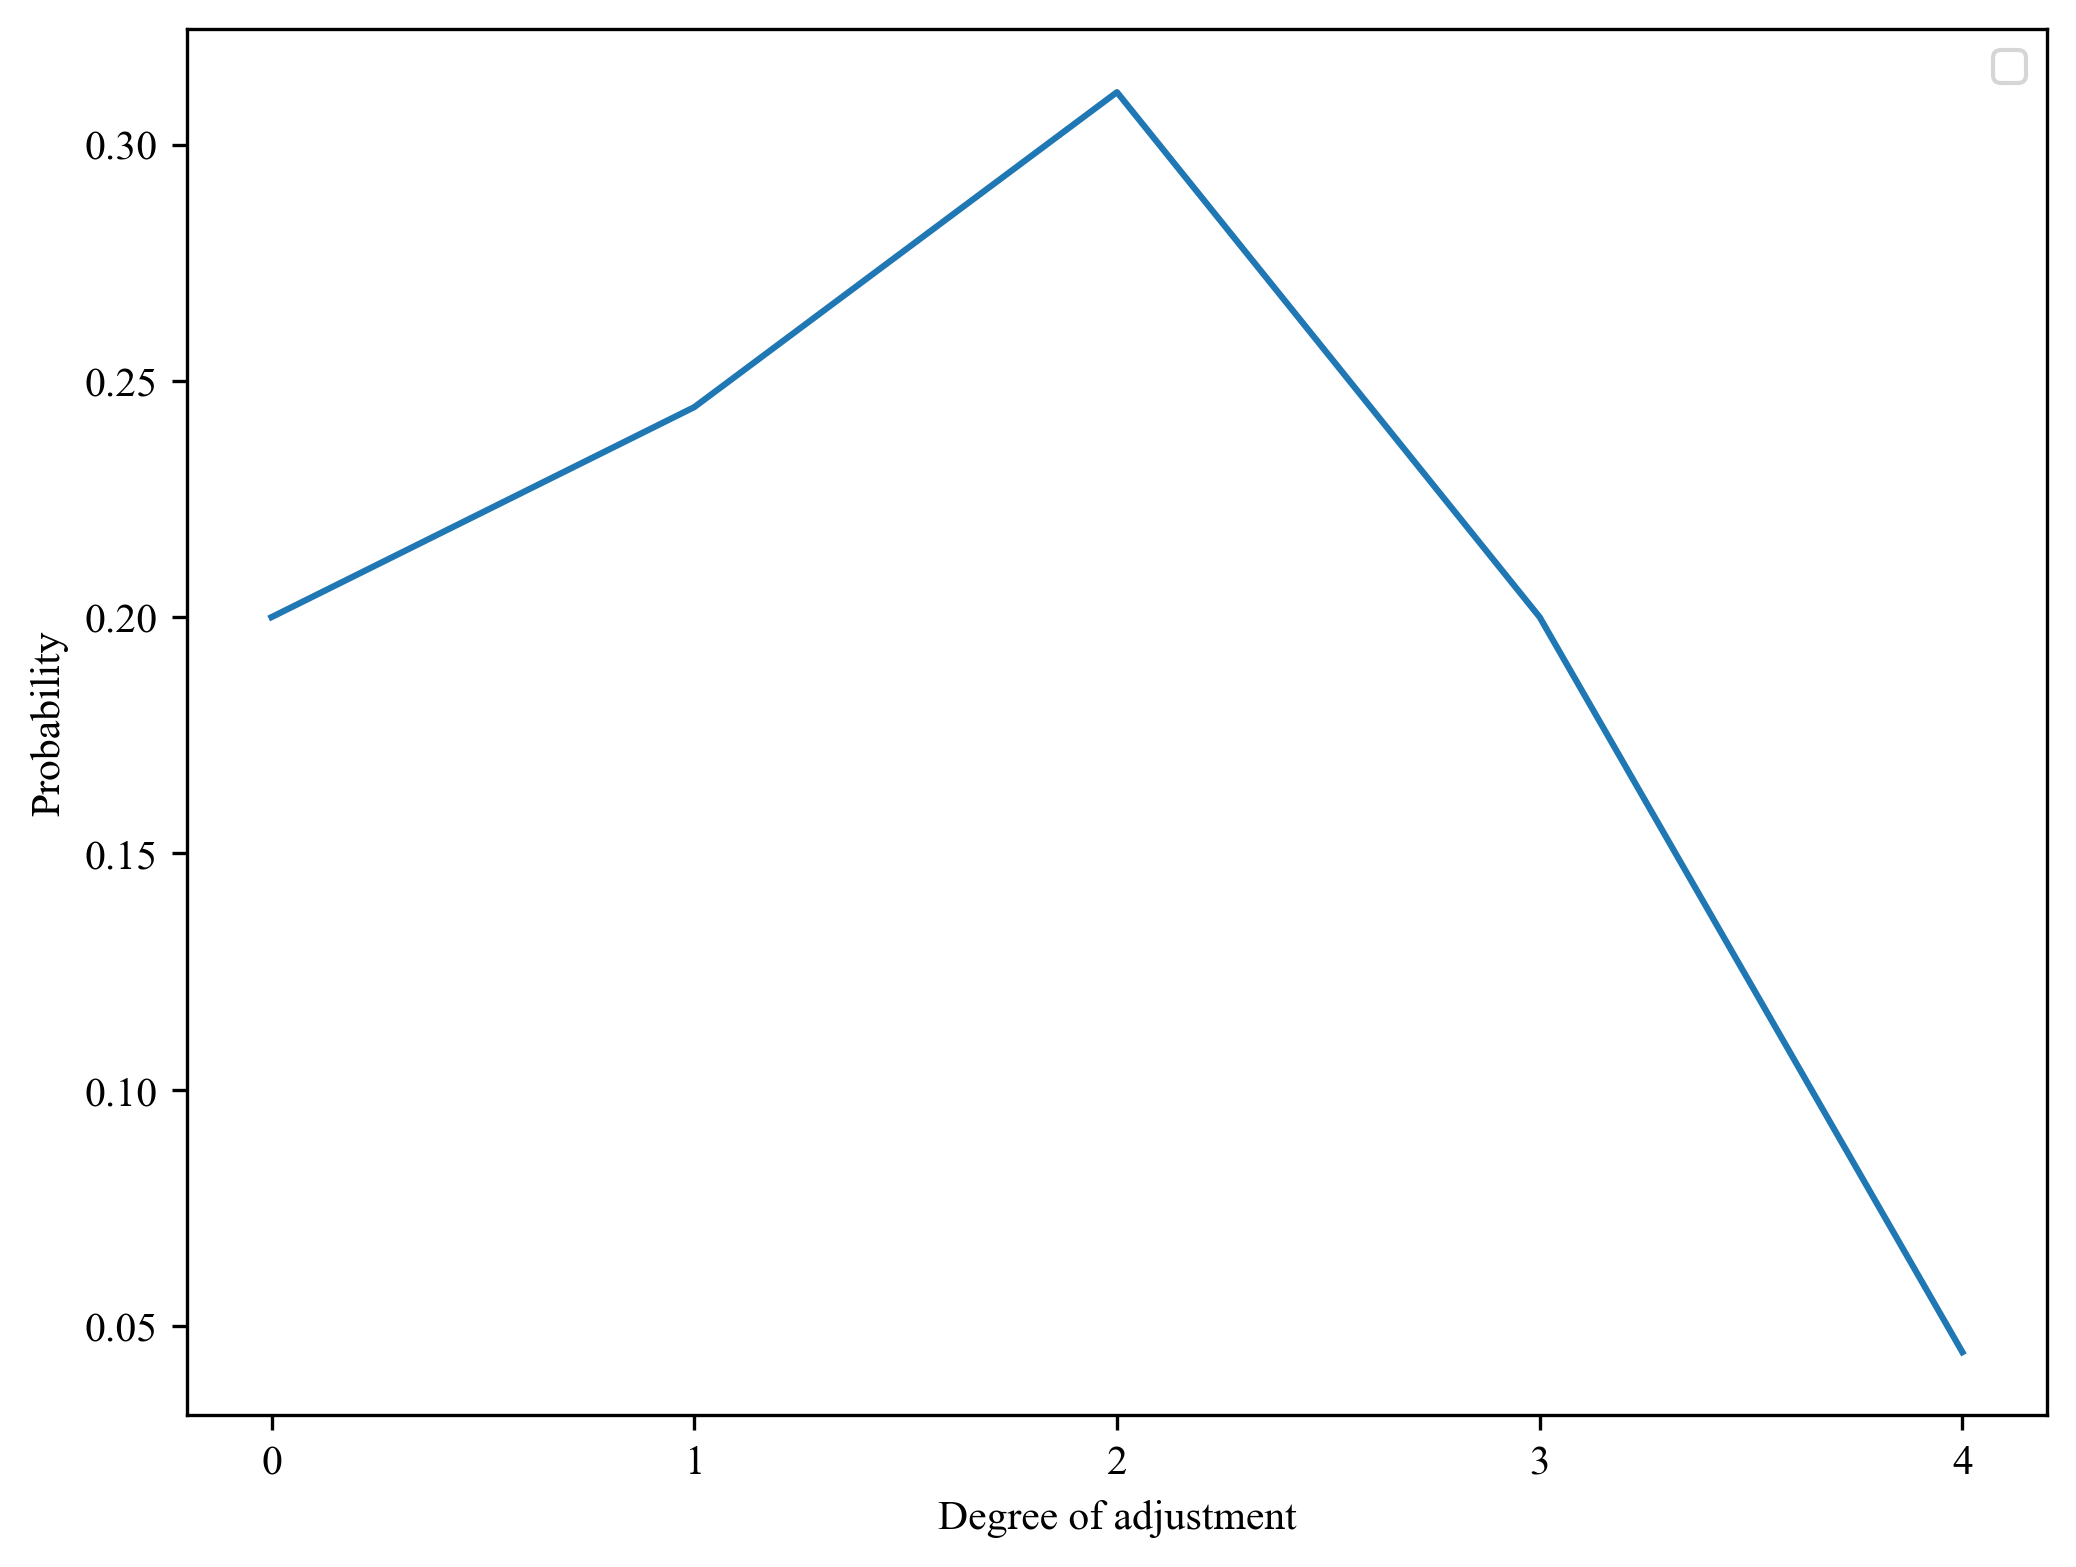

D:\WorkFile\ResearchProjects\analysis_of_IBTDM\COFFEE_10percent\code\jupytercode\../survey_data_ana\IBTDM_acc_distribution.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df['adjust'] = df[['adjust']].applymap(lambda x: str(x))
D:\WorkFile\ResearchProjects\analysis_of_IBTDM\COFFEE_10percent\code\jupytercode\../survey_data_ana\IBTDM_acc_distribution.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


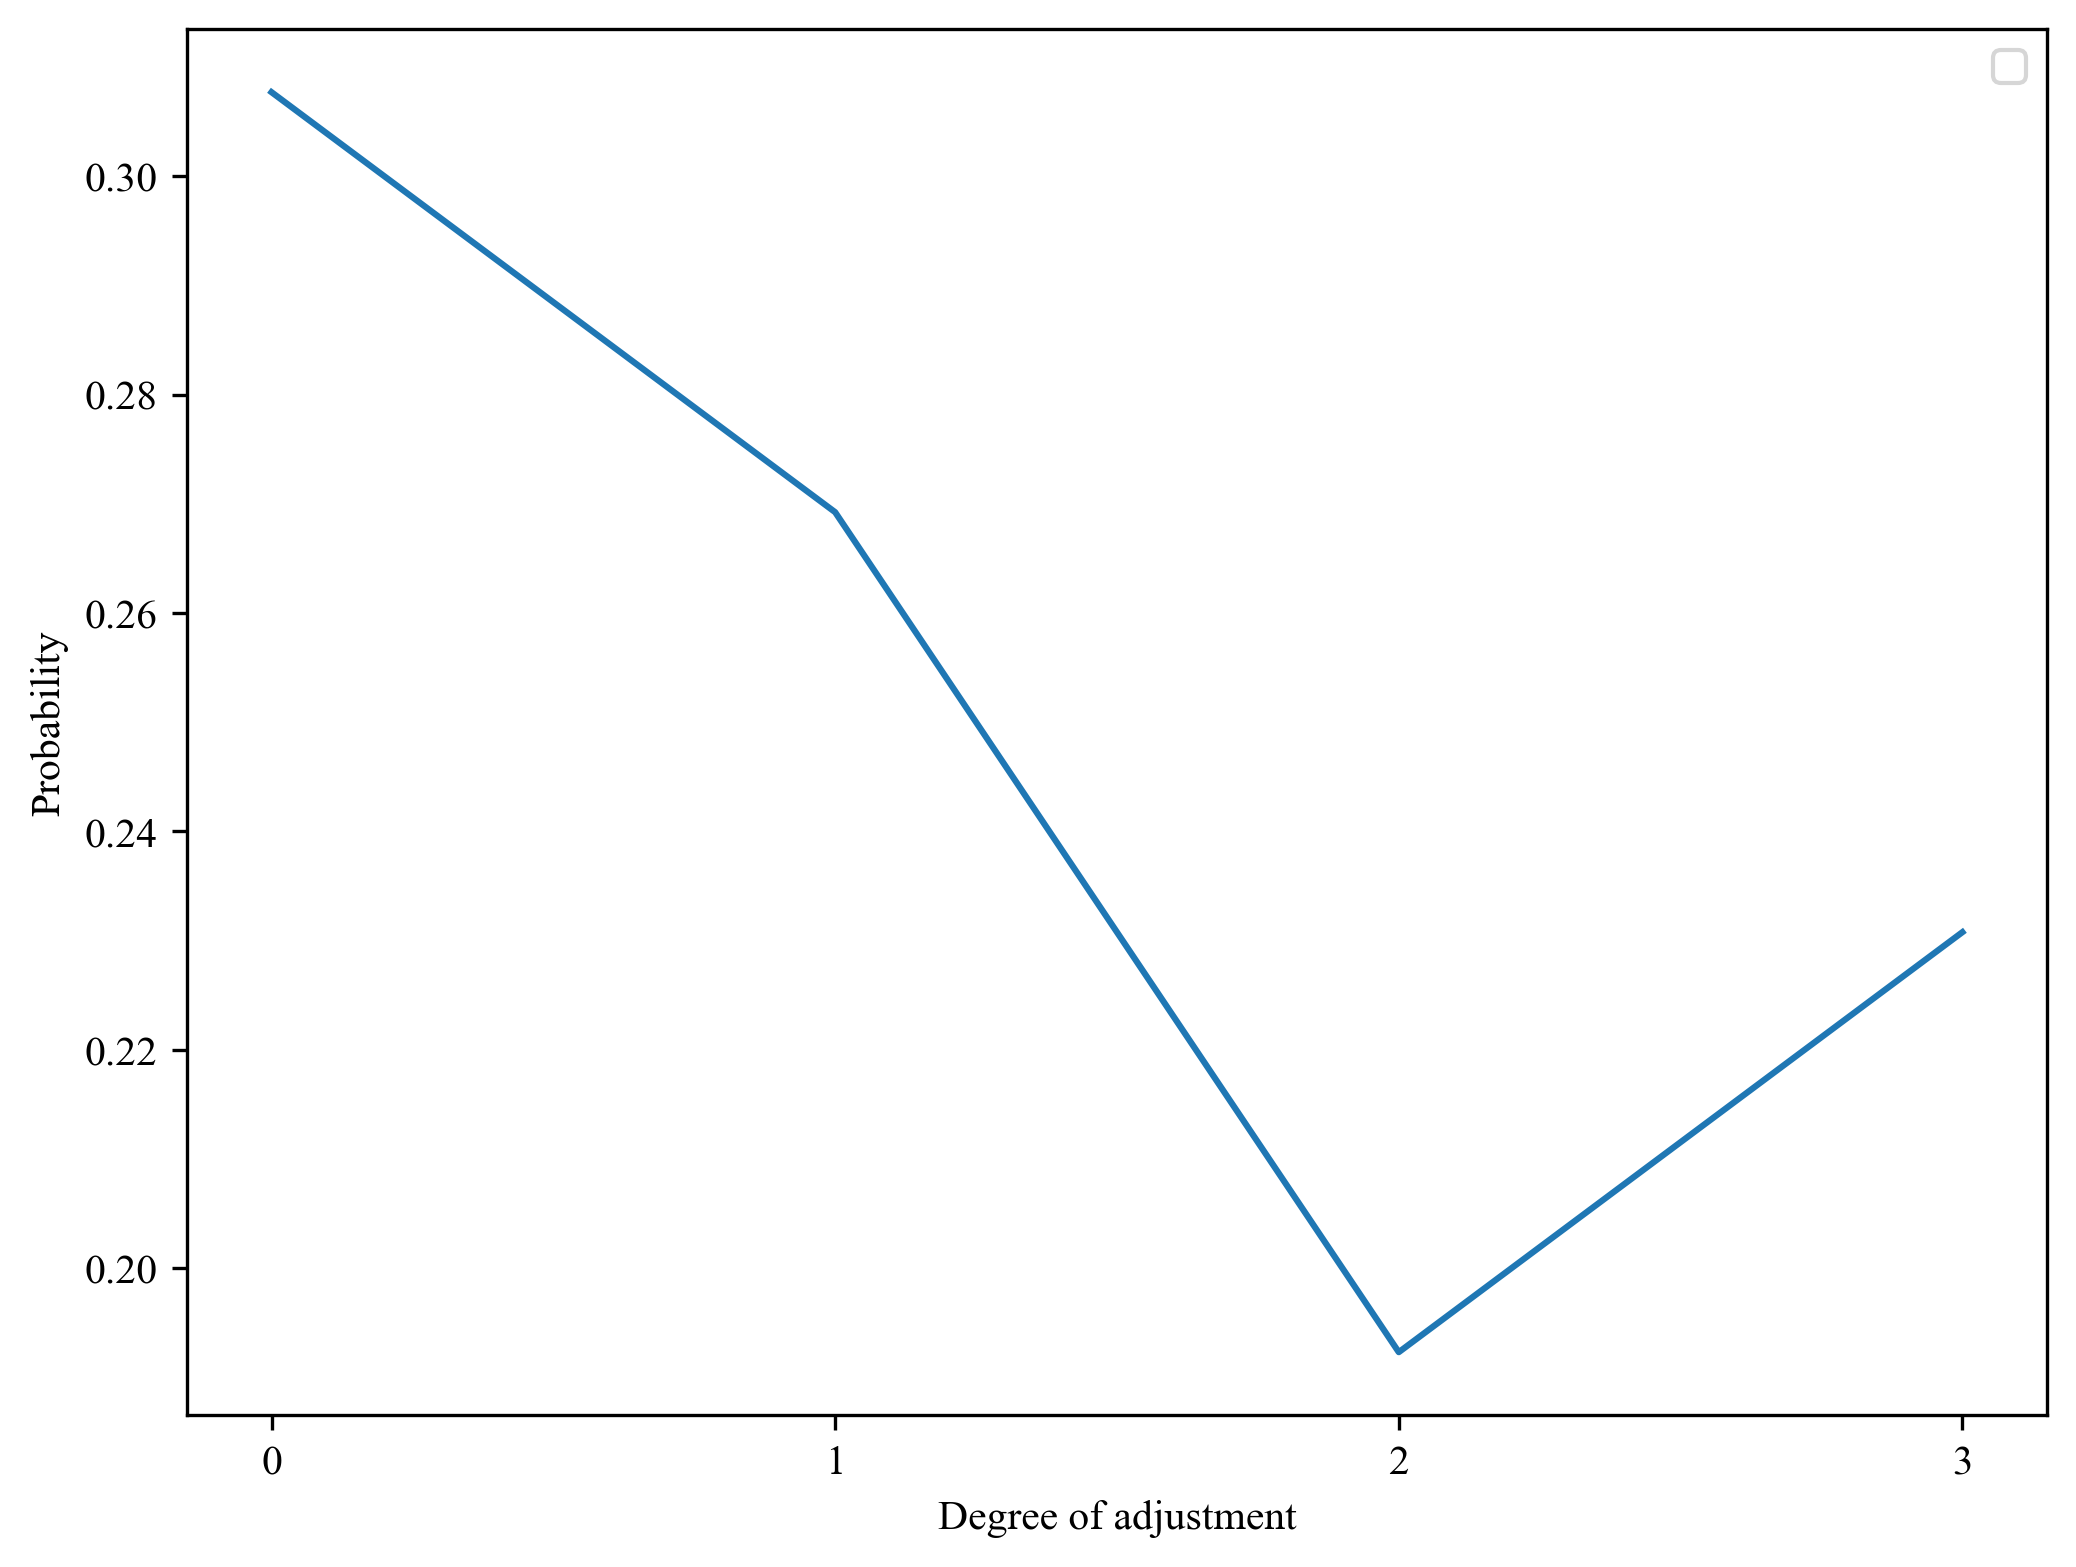

In [3]:
IBTDM_acc_distribution.distribution_plot.commuting_veh_dis(input_dis_file="../../data/survey_data/company_survey_data/AdjustdepartureforStrongcom.xlsx")
IBTDM_acc_distribution.distribution_plot.commuting_veh_dis(input_dis_file="../../data/survey_data/company_survey_data/AdjustdepartureforMediumgcom.xlsx")
IBTDM_acc_distribution.distribution_plot.commuting_veh_dis(input_dis_file="../../data/survey_data/company_survey_data/AdjustdepartureforWeakcom.xlsx")
IBTDM_acc_distribution.distribution_plot.veh_for_business_family_dis(input_dis_file="../../data/survey_data/company_survey_data/Adjustdepartureforlocalveh.xlsx")
IBTDM_acc_distribution.distribution_plot.veh_for_business_family_dis(input_dis_file="../../data/survey_data/company_survey_data/Adjustdeparturefornonlocalveh.xlsx")                                                            

In [4]:
company_survey_data_process.survey_data.get_dis_periods(data_file="../../data/survey_data/survey_data.xlsx",
                                adjust_file="../../data/survey_data/company_survey_data/Adjustdepartureforcomvehperiods.xlsx")

survey data:500.
After filtering out the erroneous data, the remaining questionnaire data consists of500
The total number of questionnaires using private cars for travel:500


# 2.Determination of departure time adjustment amplitude based on the distribution of willingness to adjust departure time among different groups

In [5]:
get_thre_basedon_surveydata.get_thre.get(portrait_file="../../data/veh_portrait/veh_all_sam_portrait.csv",
                tra_regu_file="../../data/travel_regu_data/veh_regu_cluster.csv",
                com_regu1_file="../../data/survey_data/company_survey_data/AdjustdepartureforStrongcom.xlsx",
                 com_regu2_file="../../data/survey_data/company_survey_data/AdjustdepartureforMediumgcom.xlsx",
                 com_regu3_file="../../data/survey_data/company_survey_data/AdjustdepartureforWeakcom.xlsx",
                 familyveh_file="../../data/survey_data/company_survey_data/Adjustdepartureforlocalveh.xlsx",
                 businessveh_file="../../data/survey_data/company_survey_data/Adjustdeparturefornonlocalveh.xlsx",
                 data_save_file="../../data/survey_data/adj_thre_data.csv")

total number of vehicles 491980,commuting vehicles with strong regularity84562,commuting vehicles with medium regularity 114071,commuting vehicles with weak regularity105056,taxis 22314,local vehicles58505,non local vehicles107472


../survey_data_ana\get_thre_basedon_surveydata.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['period'] = 0
../survey_data_ana\get_thre_basedon_surveydata.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['thre1'] = 0
../survey_data_ana\get_thre_basedon_surveydata.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

total number of threshold table1099358


# 3.The effect of COFFEE

In [15]:
# Solving requires a large amount of memory and requires running on the server. Here is only an example. 
# Randomly sample 100 samples from the sample set for departure time optimization.
import logging
file_path = "../../data/optim_data/optim_trips_spilt_allday_0425/"
file_name_list = os.listdir(file_path)
logger = logging
for i in range(len(file_name_list)):
    print("deal with {0} file: {1}".format( i , file_name_list[i] ))
    tmp_obj = opt_solve_SAT.solve(opt_trips_file=file_path+file_name_list[i],
                    adj_thre_file="../../data/survey_data/adj_thre_data.csv",
                    ts=15, is_sample=True, sample_num=2000, research_hour=24, 
                    num_search_workers=8, logger=logger)
    tmp_obj.declare_solver()
    tmp_obj.defvar()
    tmp_obj.creacons()
    tmp_obj.crea_obj_func()
    tmp_obj.Invoke()
    tmp_obj.give_solution(is_save=True, 
        save_data_path="../../data/survey_data/trip_solution_allday_0425/sub_"+file_name_list[i])

deal with 0 file: optim_trips_allday_425_0.csv
Constructor completed
Declaration solver completed
Define variables completed
Create constraint completed
Create objective function completed
Start solving
Solve completed
Total cost = 141.0

Result organization completed
Program execution time: 1.25min
deal with 1 file: optim_trips_allday_425_1.csv
Constructor completed
Declaration solver completed
Define variables completed
Create constraint completed
Create objective function completed
Start solving
Solve completed
Total cost = 124.0

Result organization completed
Program execution time: 1.08min
deal with 2 file: optim_trips_allday_425_2.csv
Constructor completed
Declaration solver completed
Define variables completed
Create constraint completed
Create objective function completed
Start solving
Solve completed
Total cost = 117.0

Result organization completed
Program execution time: 1.09min
deal with 3 file: optim_trips_allday_425_3.csv
Constructor completed
Declaration solver completed

In [16]:
# Merge the solved subsets
subset_merge.merge.start(subfile_path = "../../data/survey_data/trip_solution_allday_0425/",
            save_data = "../../data/survey_data/merge_solution_optim_trips_allday_425.csv")

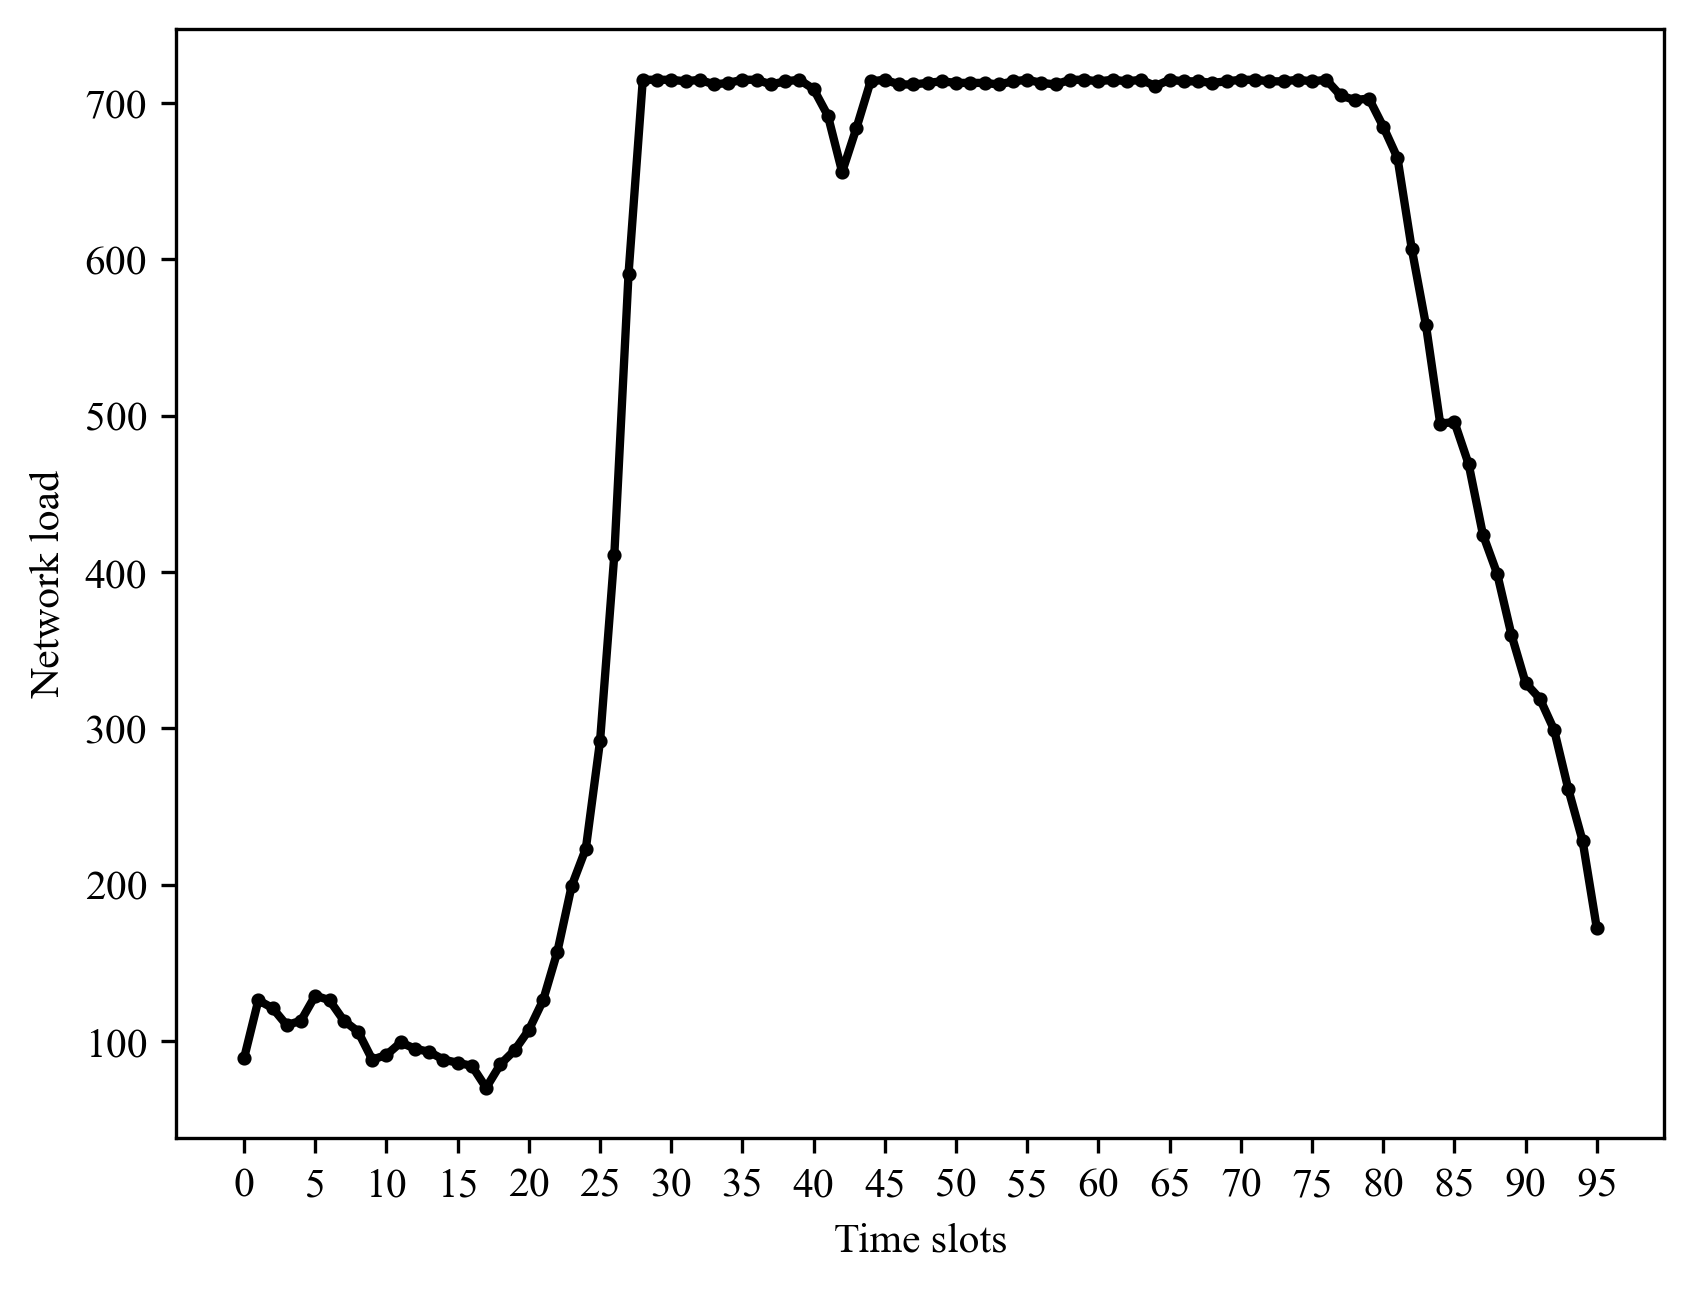

In [17]:
# network load after optimization
netload_ana.analysis.plot_netload(file="../../data/survey_data/merge_solution_optim_trips_allday_425.csv",
                  save_file="../../data/survey_data/networkloadplot_allday/merge_solution_netload_plot.csv",
                  ts=15,opti_after=True)

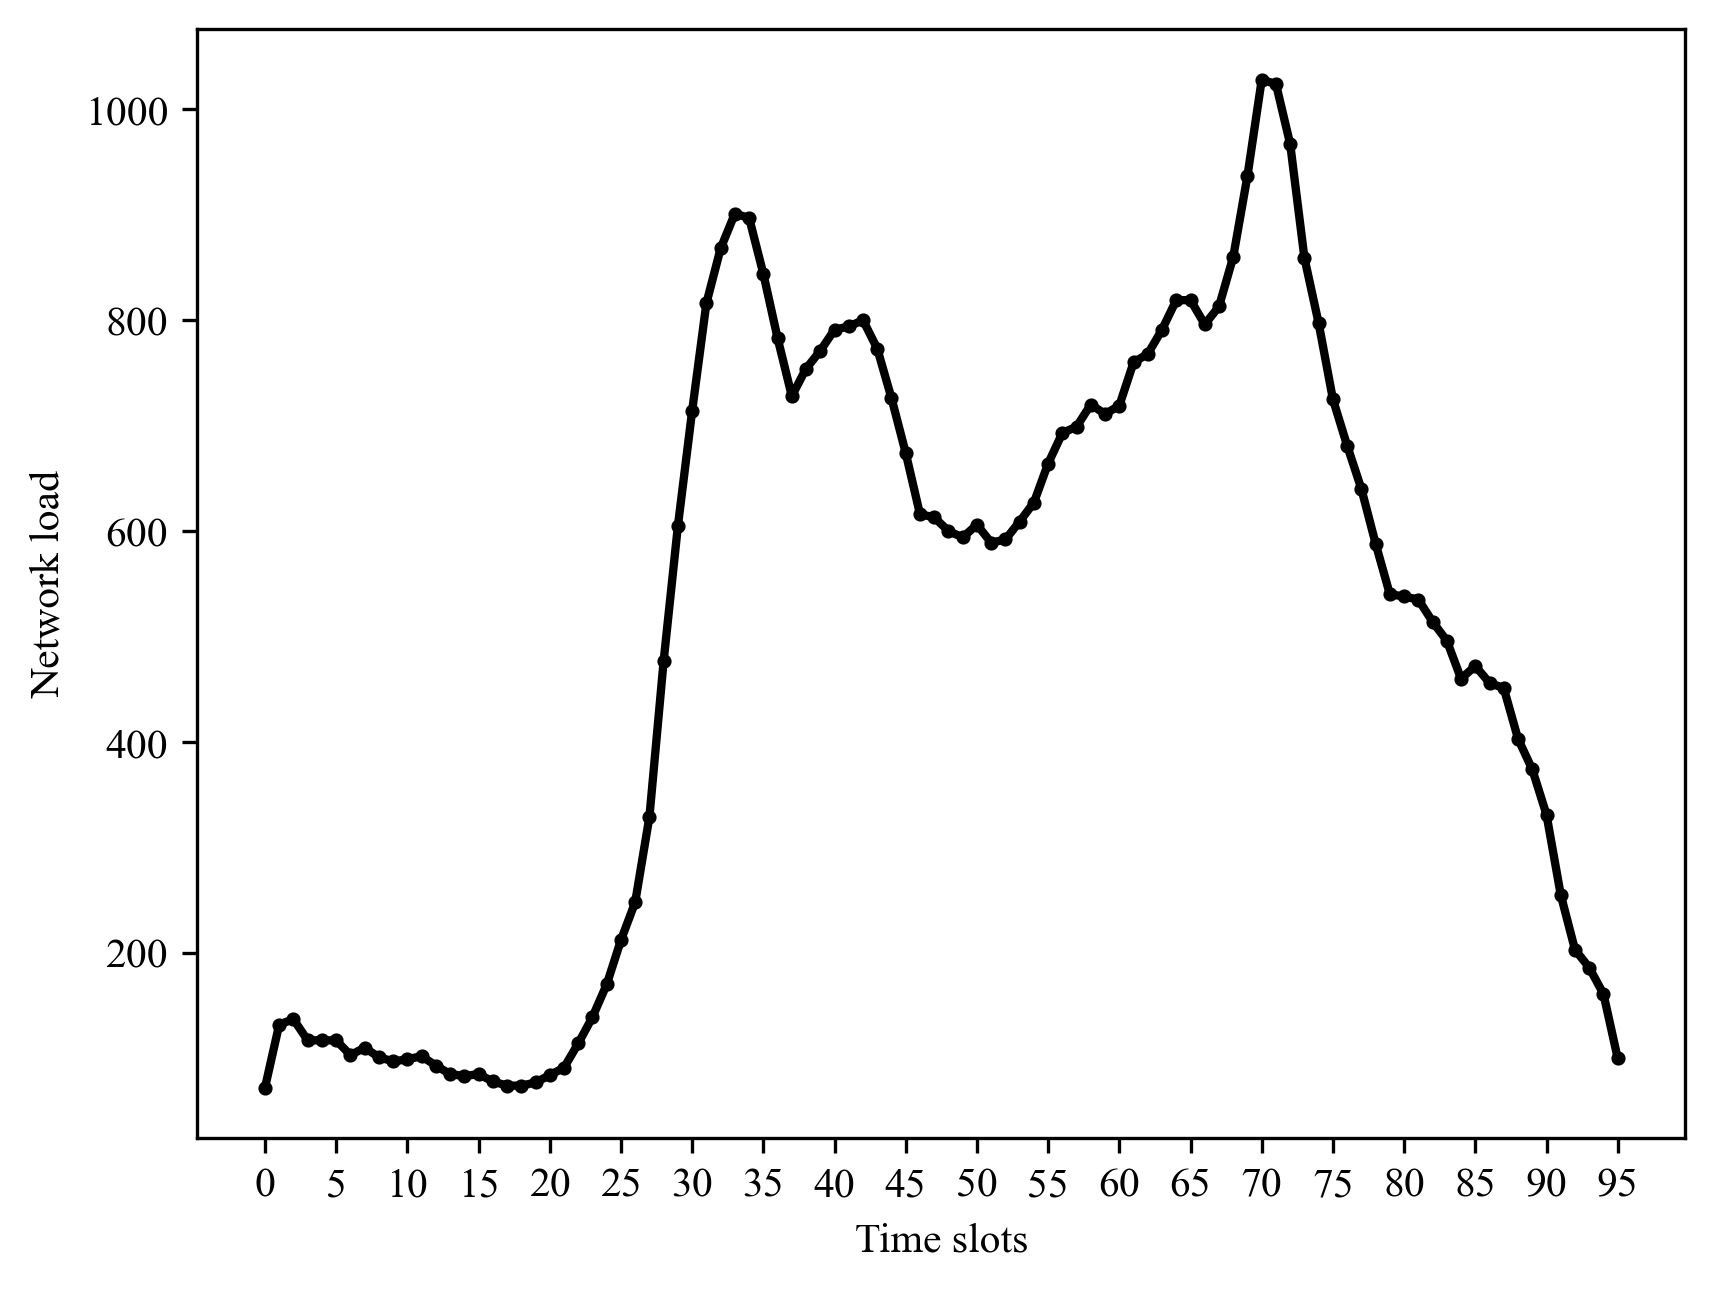

In [18]:
# network load before optimization
netload_ana.analysis.plot_netload(file="../../data/survey_data/merge_solution_optim_trips_allday_425.csv",
                  save_file="../../data/survey_data/networkloadplot_allday/origin_netload_plot.csv",
                  ts=15,opti_after=False)

提早出行人数4741，占比为0.39508333333333334，延迟出行人数3954，占比为0.3295,保持不变的人数3305，占比为0.27541666666666664


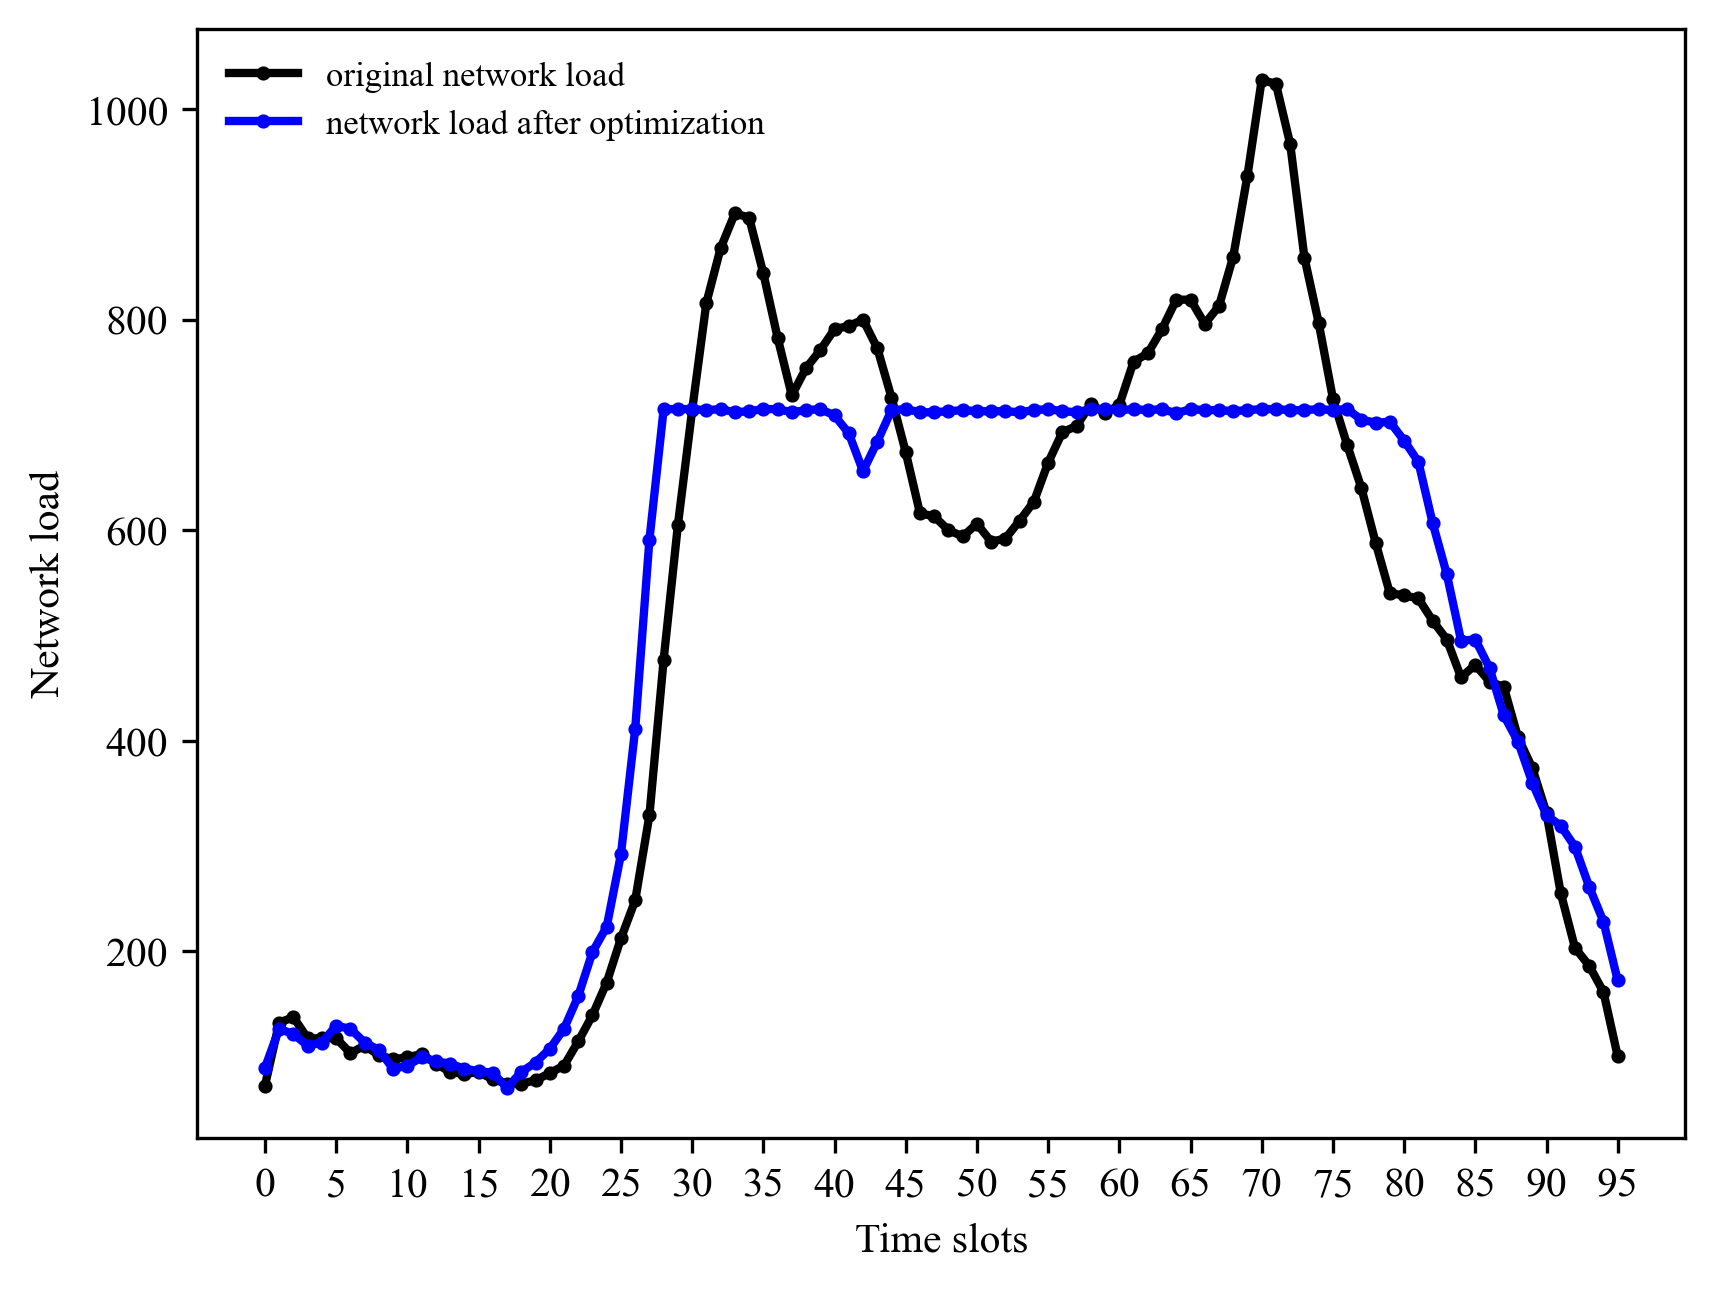

In [19]:
netload_ana.analysis.plot_load_together_cons_tra(file="../../data/survey_data/merge_solution_optim_trips_allday_425.csv",
                        save_file="../../data/survey_data/networkloadplot_allday/netload_plot_together.csv", ts=15)

# 4. Simulation analysis of COFFEE optimization effect

In [20]:
# Obtain free travel time for each trip
get_dis_after_policy.trip_dis.get_free_speed_trip_file(OD_file_with_free_speed="../../data/simu_pol_eva_data/OD_with_freespeed_0425.csv",
                  trip_after_pol="../../data/survey_data/merge_solution_optim_trips_allday_425.csv",
                  data_save_file="../../data/survey_data/simulation_data/trip_freespeed_after_pol.csv")

12000
12000


In [21]:
# Obtain travel distribution regarding departure time and free travel time
get_trips_distribution.trips_dis.get_distribution(OD_file_free_speed="../../data/survey_data/simulation_data/trip_freespeed_after_pol.csv",
        ts=15,trip_distribution_file="../../data/survey_data/simulation_data/trip_distribution_after_pol_0425.npy")

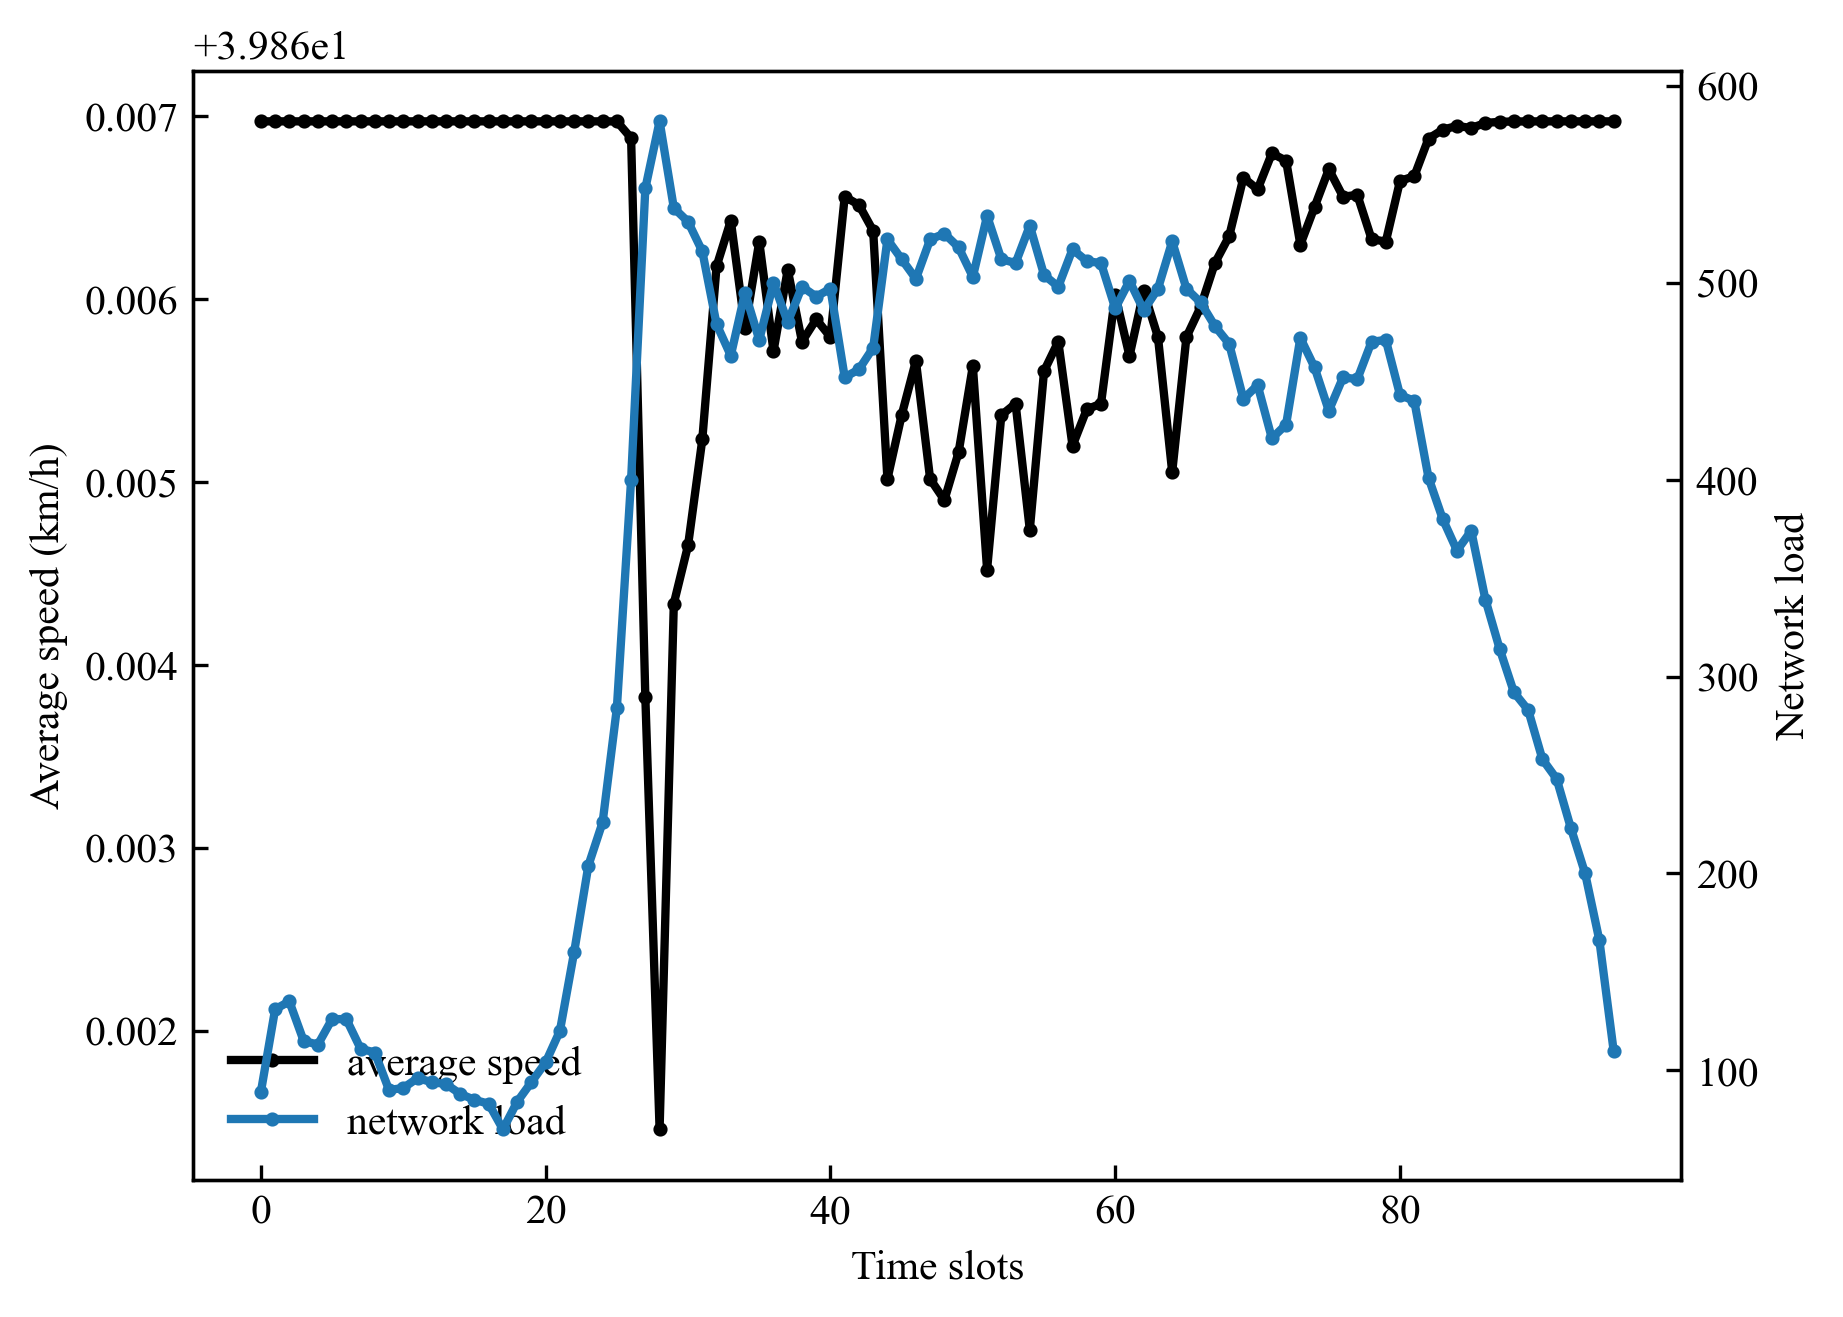

In [22]:
# SIMULATION
simu_obj = simu_traffic.simu(trip_dis_file="../../data/survey_data/simulation_data/trip_distribution_after_pol_0425.npy",
               v_n_rela_file="../../data/simu_pol_eva_data/mfdresult_newell.npy",
               free_speed=39.80,ts=15)
simu_obj.traffic_simu()
simu_obj.plot(data_save_file="../../data/survey_data/simulation_data/TrafficstateafterCOFFEE.csv")